[@LorenaABarba](https://twitter.com/LorenaABarba)

12 steps to Navier-Stokes
=====
***

You should have completed your own code for [Step 5](http://nbviewer.ipython.org/urls/github.com/barbagroup/CFDPython/blob/master/lessons/07_Step_5.ipynb) before continuing to this lesson. As with Steps 1 to 4, we will build incrementally, so it's important to complete the previous step!

We continue ...

Step 6: 2-D Convection
----
***

Now we solve 2D Convection, represented by the pair of coupled partial differential equations below:  

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$

Discretizing these equations using the methods we've applied previously yields:

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$

$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$

Rearranging both equations, we solve for $u_{i,j}^{n+1}$ and $v_{i,j}^{n+1}$, respectively.  Note that these equations are also coupled.  

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (u_{i,j}^n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j-1}^n)$$

$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (v_{i,j}^n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j-1}^n)$$

### Initial Conditions

The initial conditions are the same that we used for 1D convection, applied in both the x and y directions.  

$$u,\ v\ = \begin{cases}\begin{matrix}
2 & \text{for } x,y \in (0.5, 1)\times(0.5,1) \cr
1 & \text{everywhere else}
\end{matrix}\end{cases}$$

### Boundary Conditions

The boundary conditions hold u and v equal to 1 along the boundaries of the grid
.

$$u = 1,\ v = 1 \text{ for } \begin{cases} \begin{matrix}x=0,2\cr y=0,2 \end{matrix}\end{cases}$$

In [2]:
%matplotlib inline

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

###variable declarations
nx = 101
ny = 101
nt = 80
c = 1
dx = 2.0/(nx-1)
dy = 2.0/(ny-1)
sigma = .2
dt = sigma*dx

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((ny,nx)) ##create a 1xn vector of 1's
v = np.ones((ny,nx))
un = np.ones((ny,nx))
vn = np.ones((ny,nx))

###Assign initial conditions

u[.5/dy:1/dy+1,.5/dx:1/dx+1]=2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
v[.5/dy:1/dy+1,.5/dx:1/dx+1]=2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2

for n in range(nt+1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()

    u[1:,1:]=un[1:,1:]-(un[1:,1:]*dt/dx*(un[1:,1:]-un[0:-1,1:]))-vn[1:,1:]*dt/dy*(un[1:,1:]-un[1:,0:-1]) 
    v[1:,1:]=vn[1:,1:]-(un[1:,1:]*dt/dx*(vn[1:,1:]-vn[0:-1,1:]))-vn[1:,1:]*dt/dy*(vn[1:,1:]-vn[1:,0:-1])
    
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:,-1] = 1
    
    v[0,:] = 1
    v[-1,:] = 1
    v[:,0] = 1
    v[:,-1] = 1

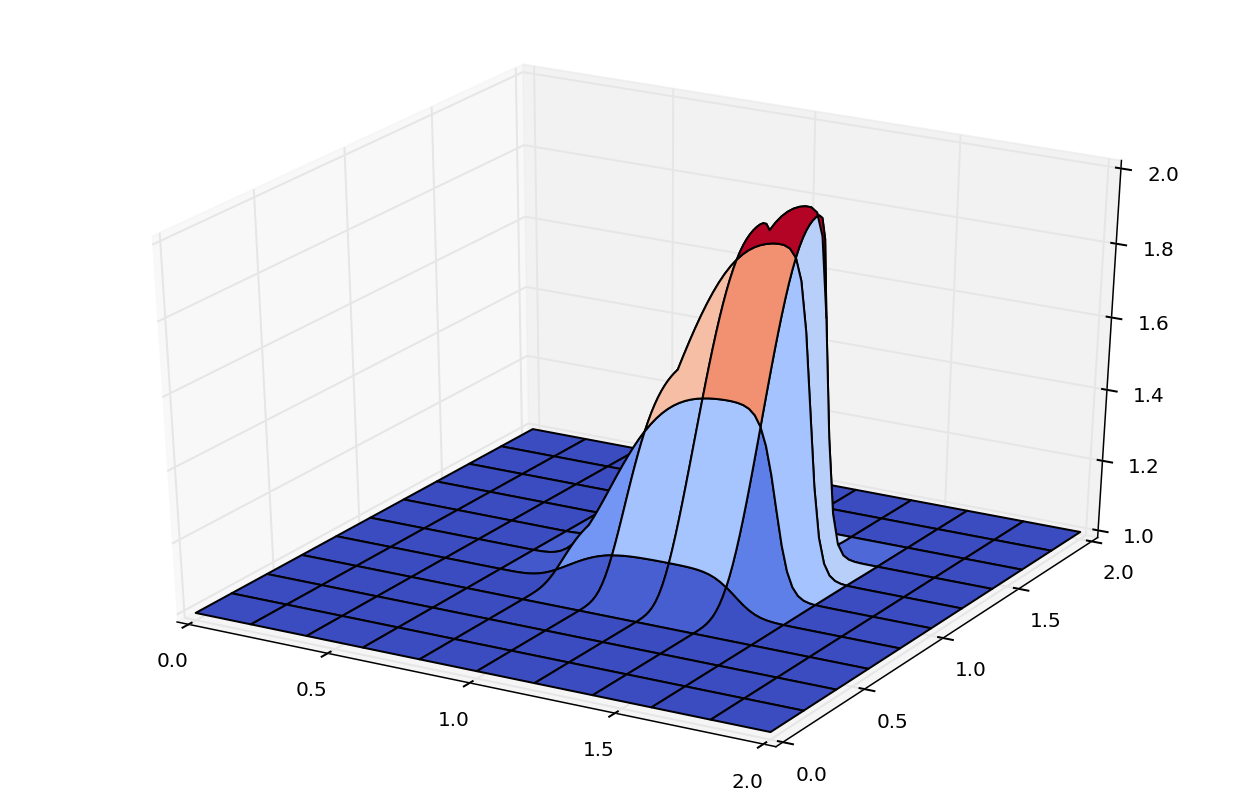

In [4]:
from matplotlib import cm ##cm = "colormap" for changing the 3d plot color palette
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(x,y)

ax.plot_surface(X,Y,u, cmap=cm.coolwarm)


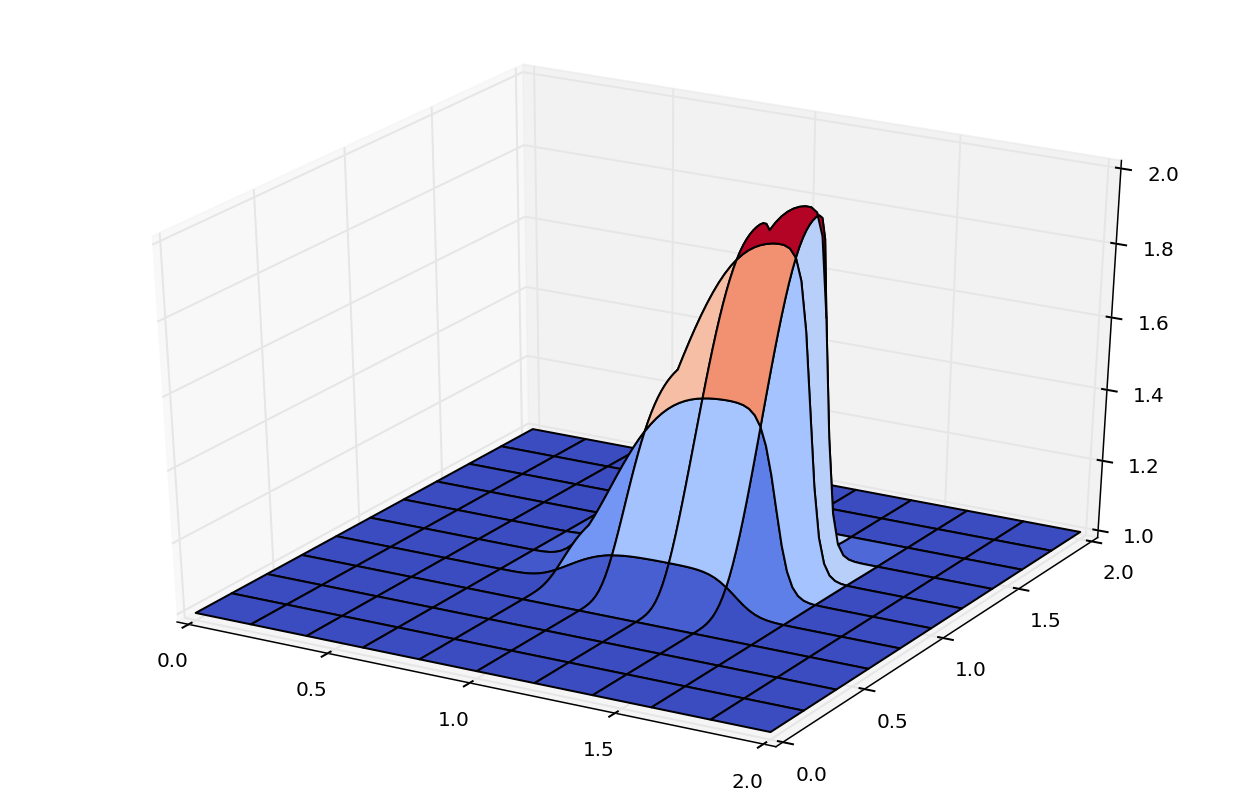

In [5]:
from matplotlib import cm ##cm = "colormap" for changing the 3d plot color palette
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(x,y)
ax.plot_surface(X,Y,v, cmap=cm.coolwarm)


## Learn More

The video lesson that walks you through the details for Steps 5 to 8 is **Video Lesson 6** on You Tube:

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('tUg_dE3NXoY')

In [7]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> (The cell above executes the style for this notebook.)